In [1]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [63]:
import os 
import numpy as np
import seaborn as sns
import cv2

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from skimage.feature import hog
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [47]:
import glob

noise = glob.glob("OK_etiquetadas_500-2/*.png")
nonoise = glob.glob("NOK_etiquetadas_500-2/*.png")

In [48]:
len(noise)

500

In [49]:
len(nonoise)

500

In [50]:
noise_Formated = []
nonoise_Formated = []

width = 128
height = 128
dim = (width, height)

for i in noise:
    img_gray = mpimg.imread(i)
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    #add the new image to a new array
    noise_Formated.append(img_resized)

for i in nonoise:
    img_gray = mpimg.imread(i)
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    #add the new image to a new array
    nonoise_Formated.append(img_resized)

In [51]:
y_noise = np.ones(len(noise_Formated))
y_nonoise = np.zeros(len(nonoise_Formated))

In [52]:
all_images = np.vstack((noise_Formated,nonoise_Formated))
all_images.shape

(1000, 128, 128)

In [53]:
all_labels = np.hstack((y_noise,y_nonoise))
all_labels.shape

(1000,)

In [54]:
all_images=all_images/255

In [55]:
def hog_feature_extraction(all_images):
    hog_features = []
    for i in all_images:
        features, _ = hog(i, 
                          orientations = 11,
                          pixels_per_cell = (16,16), 
                          cells_per_block=(2, 2), 
                          transform_sqrt = False,
                          visualize=True,
                         feature_vector = True)
        hog_features.append(features)
    return hog_features

In [56]:
hog_features = hog_feature_extraction(all_images)

In [57]:
X = np.array(hog_features)
y = np.array(all_labels)

In [58]:
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size = 0.1, stratify=y, random_state = 42)

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size = 0.111, stratify=y_tv, random_state = 42)

In [60]:
X_train.shape

(800, 2156)

In [61]:
X_test.shape

(100, 2156)

In [65]:
parameters = {'C':[0.1,1,10,100], 'kernel':['linear','rbf']}
model_svm = GridSearchCV(svm.SVC(), parameters, cv=5)
model_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']})

In [67]:
print(f"Mejores parametros: {model_svm.best_params_}")

Mejores parametros: {'C': 100, 'kernel': 'rbf'}


In [68]:
y_train_predict = model_svm.predict(X_train)
y_val_predict = model_svm.predict(X_val)
y_test_predict = model_svm.predict(X_test)

In [69]:
print(classification_report(y_train,y_train_predict))
print(classification_report(y_val,y_val_predict))
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400
         1.0       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85        50
         1.0       0.84      0.86      0.85        50

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100

              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82        50
         1.0       0.86      0.74      0.80        50

    accuracy                           0.81       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.81      0.81       100



In [70]:
!pip install -q scikit-plot
import scikitplot as skplt

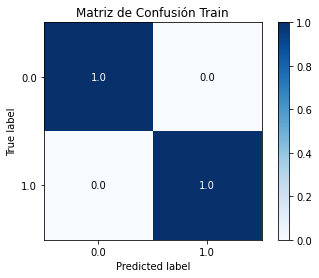

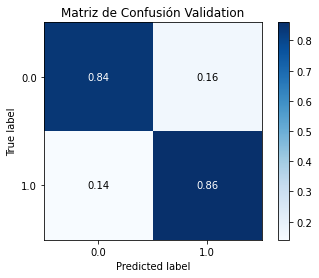

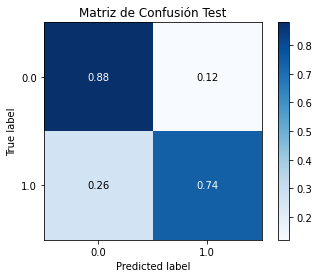

In [74]:
skplt.metrics.plot_confusion_matrix(y_train,y_train_predict, normalize=True)
plt.title('Matriz de Confusión Train')

skplt.metrics.plot_confusion_matrix(y_val,y_val_predict, normalize=True)
plt.title('Matriz de Confusión Validation')

skplt.metrics.plot_confusion_matrix(y_test,y_test_predict, normalize=True)
plt.title('Matriz de Confusión Test')

plt.show()